# Statistical Power

In [1]:
import numpy  as np
import pandas as pd
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

In [2]:
pd.options.display.float_format = '{:,.3f}'.format

### What Is Statistical Power?
Statistical power, or the power of a hypothesis test is:
- Power is the probability that the test correctly rejects the (false) null hypothesis, when the alternative hypothesis is true.
- That is, the probability of a true positive result.
- Power is the probability of finding statistically significant results when the Null Hypothesis is false (there is a difference).
- It is only useful when the null hypothesis (the assumption that nothing has changed) is rejected.


**Type II Error**: The failure to rejection a false null hypothesis (when there is a signiﬁcant eﬀect) - called a false negative. The p-value is pessimistically large.
- **Low Statistical Power**: Large risk of committing Type II errors, e.g. a false negative.
- **High Statistical Power**: Small risk of committing Type II errors.

**Alpha** is usually expressed as a proportion. If the confidence level is 95%, then alpha would equal 1 - 0.95 or 0.05. Alpha refers to significance level, the probability of making a Type I error .

Experimental results with too low statistical power will lead to invalid conclusions about the meaning of the results.

Therefore a minimum level of statistical power must be sought:
- It is common to design experiments with a statistical power of 80% or better, e.g. 0.80.
- This means a 20% probability of encountering a Type II area.
- This is diﬀerent from the 5% likelihood of encountering a Type I error for the standard confidence level.

#### Perhaps the most common use of a power analysis is in the estimation of the minimum sample size required for an experiment.

## --------------------------------------------------------------------------------

### Student’s t-Test Power Analysis
A statistical hypothesis test for comparing the means from two samples of Gaussian variables.

#### Null hypothesis (H0):
The assumtion: The sample populations have the same mean, e.g. that there is no diﬀerence between the samples, that the samples are drawn from the same underlying population.

Calculate a p-value that can be interpreted as to whether the samples are the same (fail to reject the null hypothesis), or there is a statistically signiﬁcant diﬀerence between the samples (reject the null hypothesis).

#### Signiﬁcance level (alpha): 5% or 0.05.

#### Effect size measure: Cohen’s d of at least 0.80.
- A measure for comparing the diﬀerence in the mean from two groups is the Cohen’s d measure.
- Calculates a standard score describing diﬀerence in terms of the number of standard deviations that the means are diﬀerent.
- A large eﬀect size for Cohen’s d is 0.80 or higher, as is commonly accepted when using the measure.

#### Statistical Power: 80% or 0.80.
- Use the default and assume a minimum statistical power of 80% or 0.8.
 
#### For a given experiment with these defaults:
- An experimenter may be interested in estimating a suitable sample size.
- How many observations are required from each sample in order to:
    - At least detect an eﬀect of 0.80 (effect size).
    - with an 80% chance of detecting the eﬀect if it is true - 20% of a Type II error (statistical power).
    - And a 5% chance of detecting an eﬀect if there is no such eﬀect (Type I error). 

We can solve this using a power analysis. 

### Statsmodels library provides:
- The TTestIndPower class for calculating a power analysis for the Student’s t-test with independent samples.
- The TTestPower class can perform the same analysis for the paired Student’s t-test.
- The function solve_power() can be used to calculate one of the four parameters in a power analysis.

In this case, the experimenter is calculating the sample size.

Use the function by providing the three pieces of information we know:
- signiﬁcance level (alpha)
- effect size
- statistical power

Then setting the size of argument the experimenter wishes to calculate the answer of (nobs1) to None. This tells the function what to calculate. 

#### A note on sample size:
the function has an argument called ratio that is the ratio of the number of samples in one sample to the other. If both samples are expected to have the same number of observations, then the ratio is 1.0. If, for example, the second sample is expected to have half as many observations, then the ratio would be 0.5.

The TTestIndPower instance must be created, then the experimenter can call the solve power() with the arguments to estimate the sample size for the experiment.

#### estimate sample size via power analysis

In [3]:
# parameters for power analysis
effect = 0.8
alpha = 0.05  # significance level
power = 0.8

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


The above example:
- Calculates and prints the estimated number of samples for the experiment as 25.
- This would be a suggested minimum number of samples required to see an eﬀect of the desired size.

## --------------------------------------------------------------------------------

### Power Curves

Power curves are line plots that show how the change in variables, such as eﬀect size and sample size, impact the power of the statistical test.

- The plot power() function can be used to create power curves.
- The dependent variable (x-axis) must be speciﬁed by name in the dep var argument.
- Arrays of values can then be speciﬁed for the:
    - sample size (nobs)
    - eﬀect size (effect size)
    - signiﬁcance level (alpha) parameters.
- One or multiple curves will then be plotted showing the impact on statistical power.

For example, we can assume a signiﬁcance level of 0.05 (the default for the function) and explore the change in sample size between 5 and 100 with low, medium, and high eﬀect sizes.

### calculate power curves for varying sample and effect size

 Effect Sizes:
[0.2 0.5 0.8]

 Sample Sizes:
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


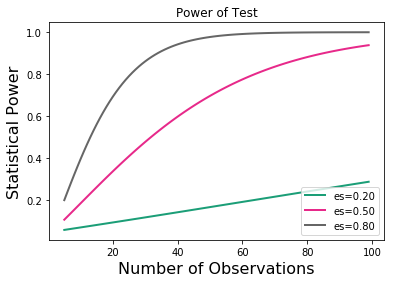

In [4]:
# parameters for power analysis
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))

print(" Effect Sizes:")
print(effect_sizes)
print("\n Sample Sizes:")
print(sample_sizes)

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.xlabel("Number of Observations", fontsize=16)
plt.ylabel("Statistical Power",  fontsize=16)
plt.show()

- The above example creates the plot showing the impact on statistical power (y-axis) for three diﬀerent eﬀect sizes (es) as the sample size (x-axis) is increased.
- It is seen that if the experimenter is interested in a large eﬀect, that a point of diminishing returns in terms of statistical power occurs at around 40-to-50 observations.

#### Statsmodels has classes to perform a power analysis with other statistical tests, such as:
- F-test
- Z-test
- Chi-Squared test

# ====================================

### Explore some properties of the power function and see how it relates to sample size among other parameters.

In [5]:
# arguments in the listed order
# n  = sample size
# p1 = baseline value
# p2 = baseline value with lift included
# cl = confidence level

def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = norm.ppf(1 - alpha/2)
    diff = abs(p2 - p1)
    bp = (p1 + p2) / 2
    v1 = p1 * (1 - p1)
    v2 = p2 * (1 - p2)
    bv = bp * (1 - bp)
    power_part_one = norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5)/ 
                            (v1 + v2)**0.5)
    power_part_two = 1 - norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5)/
                            (v1 + v2)**0.5)
    power = power_part_one + power_part_two
    return(power)

# ---------------------------------------------------------------------------------------

def get_sample_size(power, p1, p2, cl, max_n = 1000000):
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)
        if tmp_power >= power: 
            return n 
        else: 
            n = n + 1


In [6]:
# pre-leaded parameters
p1 = 0.1     # baseline value
p2 = 0.12    # baseline value with lift included
cl = 0.95    # confidence level
n1 = 1000    # sample size

#### Power Formula
- The relation between power and sample size, is that as sample size goes up so too does power.
- Additionally, as the confidence level goes up, the power goes down.

#### Calculate the power using n = 1000 and n = 2000 in that order, along with the pre-loaded parameters, p1, p2, and cl.

In [7]:
# Look at the impact of sample size increase on power
n_param_one = get_power(n=1000, p1=p1, p2=p2, cl=cl)     # sample size = 1,000
print(n_param_one)

n_param_two = get_power(n=2000, p1=p1, p2=p2, cl=cl)     # sample size = 2,000
print(n_param_two)

0.29808032538146
0.524515256115834


#### Using the variable n1 (1000) for the sample size, find the power with a confidence level of cl = 0.8 and cl = 0.95 in that order.

In [8]:
# Look at the impact of confidence level increase on power
alpha_param_one = get_power(n=n1, p1=p1, p2=p2, cl=0.8)      # confidence level = 0.8
print(alpha_param_one)

alpha_param_two = get_power(n=n1, p1=p1, p2=p2, cl=0.95)     # # confidence level = 0.95
print(alpha_param_two)

0.5621010118690234
0.29808032538146


#### Compare the ratios. Which change has the bigger impact, increasing the confidence level or the sample size?

In [9]:
# Compare the ratios
print(n_param_two / n_param_one)          # impact on power / by increasing (sample size)
print(alpha_param_one / alpha_param_two)  # impact on power / by decreasing (confidence level)

1.7596440001351992
1.8857367092232278


With these particular values
- Decreasing the confidence level has a slightly larger impact on the power.
- Than increasing the sample size.